# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

# Data Loading & Preprocessing

In [2]:
file_path = 'input\kerala.csv' 
data = pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\k'
<>:2: SyntaxWarning: invalid escape sequence '\k'
C:\Users\balin\AppData\Local\Temp\ipykernel_14332\3226779348.py:2: SyntaxWarning: invalid escape sequence '\k'
  file_path = 'input\kerala.csv'  # Replace with your actual file path


In [21]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [3]:
label_encoder = LabelEncoder()
data['FLOODS'] = label_encoder.fit_transform(data['FLOODS'])

In [4]:
X = data.drop(columns=['SUBDIVISION', 'YEAR', 'FLOODS'])
y = data['FLOODS']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightBGM Initialization & Model Metrics

In [6]:
lgbm = lgb.LGBMClassifier()

cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC score: {cv_scores.mean()}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37, number of negative: 38
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [7]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 46, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489362 -> initscore=-0.042560
[LightGBM] [Info] Start training from score -0.042560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier()

In [8]:
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

ROC-AUC Score: 1.0


# Feature Importance Analysis

In [9]:
feature_importances = lgbm.feature_importances_
features = X.columns

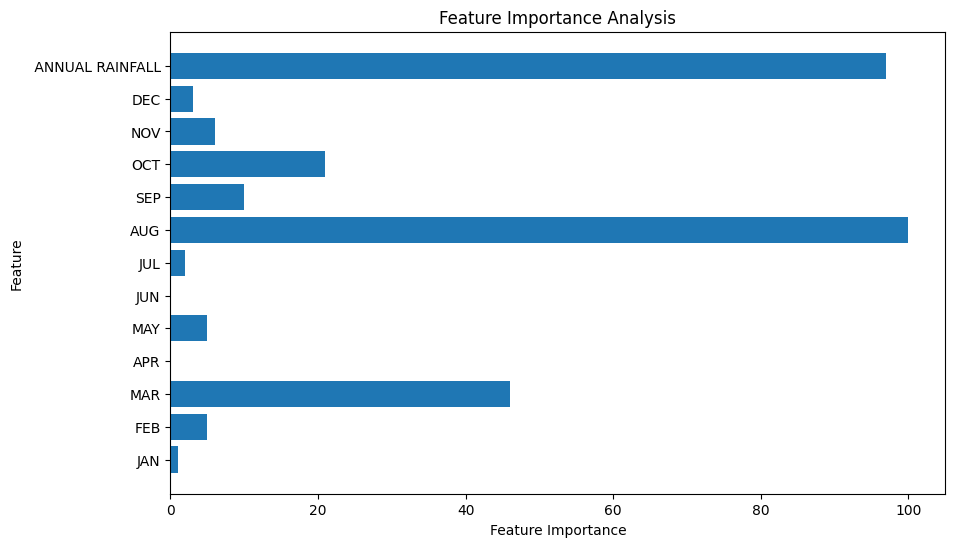

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

# Hyperparameter Tuning

In [11]:
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(lgb.LGBMClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 46, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489362 -> initscore=-0.042560
[LightGBM] [Info] Start training from score -0.042560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 50, 100]},
             scoring='roc_auc')

In [12]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated AUC score: {grid_search.best_score_}")

Best parameters found: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validated AUC score: 0.9888888888888889


In [13]:
best_lgbm = grid_search.best_estimator_
best_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 46, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489362 -> initscore=-0.042560
[LightGBM] [Info] Start training from score -0.042560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(learning_rate=0.01)

In [14]:
best_y_pred = best_lgbm.predict(X_test)
print(classification_report(y_test, best_y_pred))
print(f"Best Model ROC-AUC Score: {roc_auc_score(y_test, best_y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Best Model ROC-AUC Score: 1.0


# User Input Prediction

In [15]:
def predict_flood(user_input):
    user_data = pd.DataFrame([user_input], columns=X.columns)
    
    prediction = best_lgbm.predict(user_data)
    
    return 'YES' if prediction[0] == 1 else 'NO'

In [16]:
def get_user_input():
    user_input = {}
    print("Please enter the monthly rainfall data and annual rainfall:")
    for column in X.columns:
        user_input[column] = float(input(f"{column}: "))
    return user_input

In [19]:
user_input = get_user_input()

Please enter the monthly rainfall data and annual rainfall:


In [20]:
prediction = predict_flood(user_input)
print(f"The prediction for flood is: {prediction}")

The prediction for flood is: YES
